In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

#TensorFlow and Keras for LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load Dataset

In [3]:
#read_file=pd.read_excel("AirQualityUCI.xlsx")
#read_file=pd.to_csv("AirQualityUCI.xlsx", index=None, header=True)
df=pd.read_excel("AirQualityUCI.xlsx")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [4]:
df.tail(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [6]:
df.describe()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2004-09-21 04:30:05.193972480,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
min,2004-03-10 00:00:00,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,2004-06-16 00:00:00,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,2004-09-21 00:00:00,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2004-12-28 00:00:00,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,2005-04-04 00:00:00,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036
std,NaN,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670


In [7]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# Checking for total no. of rows having negative values across all columns

In [8]:
df.isin([-200]).sum(axis=0)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

## Replacing all the negative values with Null values

In [9]:
df=df.replace(-200, np.NaN)
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

## Replacing all the null values under the columns with the respective column means

In [10]:
num_col=df.select_dtypes(include=[np.number]).columns
#col=df.select_dtypes(include=[np.number]).columns
#print(len(col))

#Correct Approach
for col in df.columns:
    if df[col].dtype in ["float64","int64"]:
        #mean=df[col].mean()
        df[col].fillna(df[col].mean(), inplace=True)
print(f"Filled {len(num_col)} numeric columns")

#df=df.fillna(df.mean())

df.tail(3)

Filled 13 numeric columns


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9354,2005-04-04,12:00:00,2.4,1142.00,218.811816,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,218.811816,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,218.811816,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


# Extracting Month, Year and Hour from Date and Time Columns

In [11]:
df["Year"]=df.Date.astype("str").str[0:4]
df["Month"]=df.Date.astype("str").str.split("-").str[1]
df["Hour"]=df["Time"].astype("str").str[0:2]
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Hour
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754,2004,03,18
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487,2004,03,19


## Converting the String type Hour column into Integer64 type

In [12]:
df["Year"]=df.Year.astype("int64")
df["Month"]=df.Month.astype("int64")
df["Hour"]=df["Hour"].astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  Year           9357 n

# Combining Date and Time into one single column

In [13]:
datetime=pd.to_datetime(df["Date"].astype("str")+" "+ df["Time"].astype("str"))
df["DateTime"]=datetime
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Hour,DateTime
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754,2004,3,18,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487,2004,3,19,2004-03-10 19:00:00


In [14]:
df=df.drop(["Date","Time"], axis=1)
df.head(2)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Hour,DateTime
0,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754,2004,3,18,2004-03-10 18:00:00
1,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487,2004,3,19,2004-03-10 19:00:00


# Feature and Target Selection for LSTM Model

In [15]:
features_training=[]
for col in df.columns:
    if (col not in ["Datetime"] and (df[col].dtype in ["float64", "int64"])):
        features_training.append(col)
print("Training Features-",features_training)
print("\nNo. of input features:", len(features_training))
data=df[features_training].values
target=df["RH"].values

Training Features- ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Year', 'Month', 'Hour']

No. of input features: 16


In [16]:
print("Final Data Shape\n")
print("Shape of Features:", data.shape)
print("Shape of Target:", target.shape)

Final Data Shape

Shape of Features: (9357, 16)
Shape of Target: (9357,)


# Normalizing the Data using MinMaxScaler

In [17]:
sc_features= MinMaxScaler(feature_range=(0,1))
sc_target= MinMaxScaler(feature_range=(0,1))

data_scaled=sc_features.fit_transform(data)
target_scaled=sc_target.fit_transform(target.reshape(-1,1))
print("Scaling Done Successfully")

Scaling Done Successfully


# Create Sequences for LSTM and Display the shape of Data and Target

In [18]:
print("Using last 24 hours of data (1 day) to predict the next value")
time_steps=24
def create_seq(X, Y, time_steps):
    X_seq,Y_seq=[],[]
    for i in range(time_steps, len(X)):
        X_seq.append(X[i-time_steps:i])
        Y_seq.append(Y[i])
    return np.array(X_seq), np.array(Y_seq)
    
# Calling the above function   
X_sequences, Y_sequences=create_seq(data_scaled, target_scaled, time_steps)

print(f"{X_sequences.shape[0]} samples, {X_sequences.shape[1]} time_steps, {X_sequences.shape[2]} features")   
print("Target has Shape:", Y_sequences.shape)

Using last 24 hours of data (1 day) to predict the next value
9333 samples, 24 time_steps, 16 features
Target has Shape: (9333, 1)


# Train Test Split

In [19]:
train_size=int(len(X_sequences)*0.8)
X_train=X_sequences[:train_size]
Y_train=Y_sequences[:train_size]

X_test=X_sequences[train_size:]
Y_test=Y_sequences[train_size:]

print("Shape of training set:", f" {X_train.shape[0]} samples")
print("Shape of testing set:", f" {X_test.shape[0]} samples")

Shape of training set:  7466 samples
Shape of testing set:  1867 samples


# Building the LSTM Model

Funnel Architecture (128→64→32):

Early layers: Larger units to capture complex temporal patterns
Later layers: Smaller units for refinement and compression
Mimics hierarchical learning from general to specific patterns


Dropout Regularization (0.2):

Prevents overfitting by randomly deactivating 20% of neurons
Forces model to learn robust features
Essential for time-series where overfitting is common

return_sequences Parameter:

True for first two LSTM layers: Pass full sequence to next layer
False for final LSTM layer: Output single vector for dense layer


Hidden Dense Layer (16 units):

Additional processing capacity between LSTM and output
Learns complex non-linear relationships from LSTM features
ReLU activation for non-linearity

In [20]:
model=Sequential()

#First LSTM Layer with 50 units- must return sequences for next layer
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
#Prevents Overfitting
model.add(Dropout(0.2))

#Second LSTM Layer- it'll also return sequences- refines patterns
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))

#Third LSTM Layer- further compression
model.add(LSTM(units=32, return_sequences= False))
model.add(Dropout(0.2))

#Dense Layer (Hidden)- For final processing and improves performance
model.add(Dense(units=16, activation="relu"))

#Output Layer- Gives one output
model.add(Dense(1))

#Compile with Adam Optimizer
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

print("LSTM Architecture Created")



LSTM Architecture Created


# Display the Model Architecture

In [21]:
print("LSTM Model Architecture")
model.summary()

LSTM Model Architecture
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 128)           74240     
                                                                 
 dropout (Dropout)           (None, 24, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (No

# Training the Model

### Define Callbacks

In [25]:
#Early Stopping- Stop training if the validation loss doesn't improve
early_stopping=EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True, verbose=1)

In [26]:
#Training part of the model
model_history=model.fit(X_train, Y_train, epochs=150, batch_size=16, validation_split=0.2, callbacks=[early_stopping],verbose=1)
print("\nTraining Completed")

Epoch 1/150


374/374 [==============================] - 20s 32ms/step - loss: 0.0231 - mae: 0.1143 - val_loss: 0.0214 - val_mae: 0.1130
Epoch 2/150
374/374 [==============================] - 10s 26ms/step - loss: 0.0110 - mae: 0.0788 - val_loss: 0.0149 - val_mae: 0.0983
Epoch 3/150
374/374 [==============================] - 13s 34ms/step - loss: 0.0079 - mae: 0.0653 - val_loss: 0.0082 - val_mae: 0.0702
Epoch 4/150
374/374 [==============================] - 12s 32ms/step - loss: 0.0061 - mae: 0.0581 - val_loss: 0.0057 - val_mae: 0.0579
Epoch 5/150
374/374 [==============================] - 11s 29ms/step - loss: 0.0050 - mae: 0.0517 - val_loss: 0.0062 - val_mae: 0.0623
Epoch 6/150
374/374 [==============================] - 11s 30ms/step - loss: 0.0043 - mae: 0.0482 - val_loss: 0.0062 - val_mae: 0.0624
Epoch 7/150
374/374 [==============================] - 11s 28ms/step - loss: 0.0039 - mae: 0.0458 - val_loss: 0.0040 - val_mae: 0.0485
Epoch 8/150
374/374 [==============================] 

# Visualize Training History

In [27]:
print(model_history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


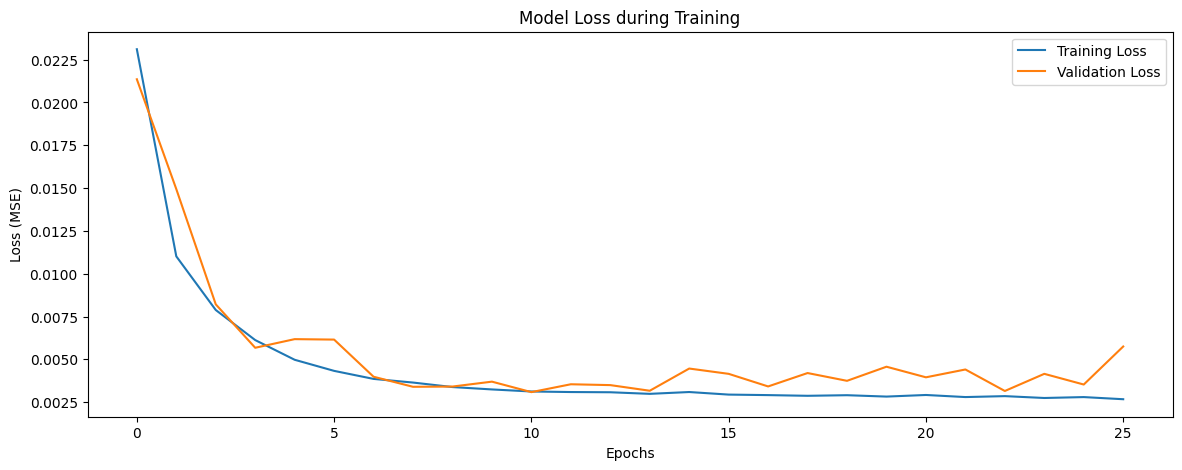

In [28]:
plt.figure(figsize=(14,5))
plt.plot(model_history.history["loss"], label="Training Loss")
plt.plot(model_history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss during Training")
plt.ylabel("Loss (MSE)")
plt.xlabel("Epochs")
plt.legend()
plt.show()

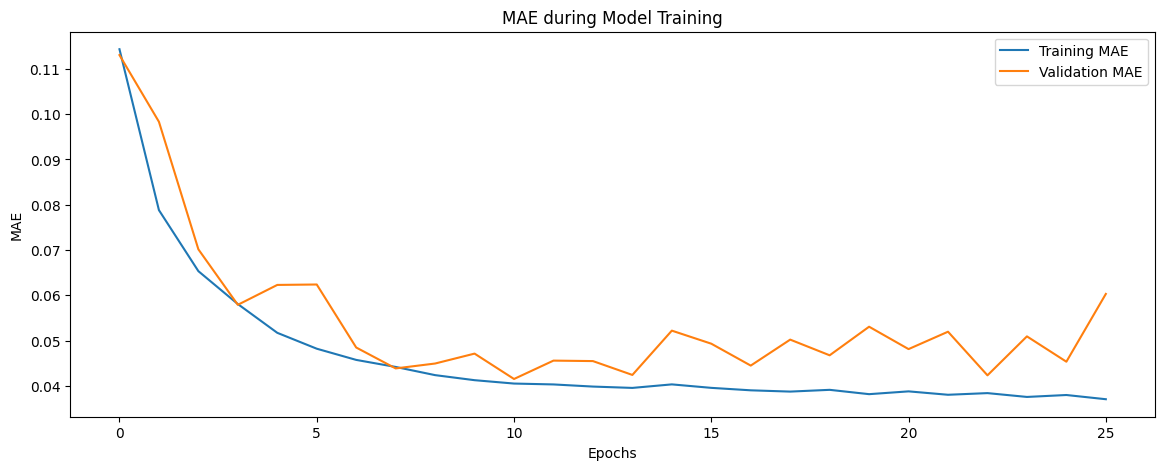

In [29]:
plt.figure(figsize=(14,5))
plt.plot(model_history.history["mae"], label="Training MAE")
plt.plot(model_history.history["val_mae"], label="Validation MAE")
plt.title("MAE during Model Training")
plt.ylabel("MAE")
plt.xlabel("Epochs")
plt.legend()
plt.show()

# Model Evaluation on Testing Set

In [30]:
y_pred_scaled=model.predict(X_test)
print("Testing Completed")
print("Shape of predictions on test set", y_pred_scaled.shape)

59/59 [==============================] - 2s 10ms/step
Testing Completed
Shape of predictions on test set (1867, 1)


### Taking Inverse Transform of the obtained values to get actual prices

In [31]:
y_pred_actual=sc_target.inverse_transform(y_pred_scaled)
y_test_actual=sc_target.inverse_transform(Y_test)
print("Inverse Scaling Done")

Inverse Scaling Done


# Calculating Evaluation Metrics

In [32]:
mae=mean_absolute_error(y_test_actual,y_pred_actual)
rmse=np.sqrt(mean_squared_error(y_test_actual,y_pred_actual))
r2=r2_score(y_test_actual,y_pred_actual)

print("Model Evaluation Metrics")
print("\nMean Absolute Error=", mae)
print("\nRoot Mean Squared Error=", rmse)
print("\nR2 Score=", r2)

Model Evaluation Metrics

Mean Absolute Error= 5.0090773937837145

Root Mean Squared Error= 6.2024613235114865

R2 Score= 0.852296984096495


# Visualize LSTM Model Predictions vs Actual

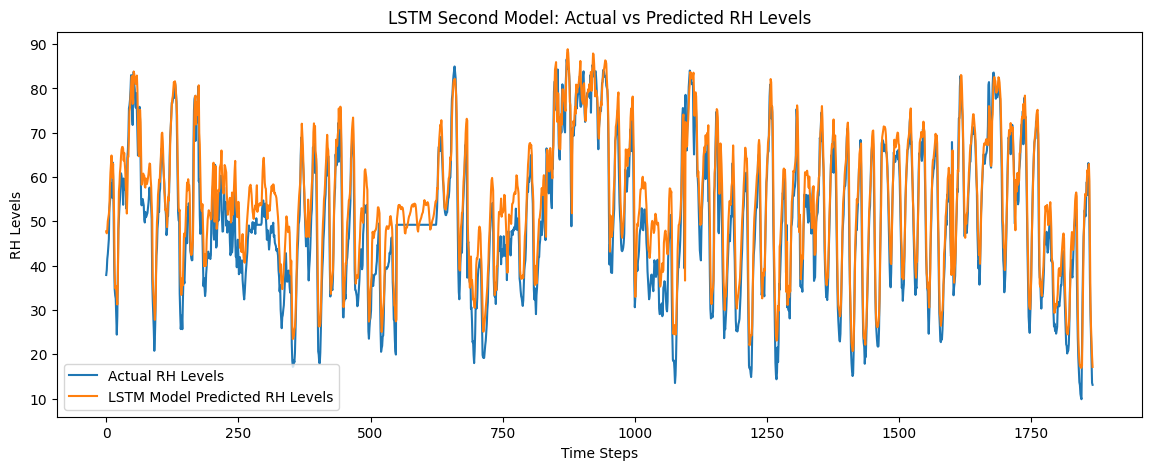

In [33]:
# Scatter recommended by Claude
plt.figure(figsize=(14,5))
plt.plot(y_test_actual,label="Actual RH Levels")
plt.plot(y_pred_actual,label="LSTM Model Predicted RH Levels")
plt.title("LSTM Model: Actual vs Predicted RH Levels")
plt.xlabel("Time Steps")
plt.ylabel("RH Levels")
plt.legend()
plt.show()

R2 Score is 0.8522, that means it can explain 85.22% of the variance in the data. As seen from the graph above, the predictions are almost 
overlapping with real data available

Strengths:

Captures daily cyclical patterns
Handles multiple correlated features effectively
Strong performance on test set

Limitations:

Cannot perform long-term forecasting due to error accumulation
Requires all input features for prediction
Real-time deployment would need continuous sensor data

## Saving the Model

In [57]:
model.save("LSTM_Air_Quality_Model.h5")
print("Model saved as 'LSTM_Air_Qaulity_Model.h5'")

Model saved as 'LSTM_Air_Qaulity_Model.h5'


## Saving the scalers

In [58]:
import pickle
with open("sc_target.pkl", "wb") as f:
    pickle.dump(sc_target,f)
with open("sc_features.pkl", "wb") as f:
    pickle.dump(sc_features, f)
print("Scalers saved")

Scalers saved


# Real Time Forecast

## Loading the already trained LSTM Model

In [59]:
model=tf.keras.models.load_model("LSTM_Air_Quality_Model.h5")
print("Model Loaded Successfully")
model.summary

Model Loaded Successfully


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001C6CBD89CC0>>

## Loading the Scalers used during training of the model

In [60]:
#Load it
with open("sc_target.pkl","rb") as f:
    sc_target=pickle.load(f)
print("Scalers loaded successfully")

Scalers loaded successfully


# Create Sequence for Future Prediction using LSTM 

In [100]:
time_steps=24
#Using the 24 hour data to predict next day values
df1=df.drop(["DateTime"], axis=1)
if (len(data_scaled)<time_steps):
    print("Insufficient Data present. Please fetch more data")
else:
    last_sequence=data_scaled[-time_steps:]
print(last_sequence.shape)

#print(last_sequence.columns)
#current_seq=last_sequence.copy().values
#input_data=current_seq.reshape(1,time_steps,len(features_training))
#print(input_data.shape)
#print(last_sequence.iloc[2][-5])
#print(df["RH"].iloc[-22])

(24, 16)


# Make Prediction for next 30 days

In [102]:
def predict_next_n_days(model,last_sequence,time_steps,sc_target,n_days):
    predictions=[]
    current_seq=last_sequence.copy()

    for i in range(n_days*time_steps):
        #Reshaping the current_seq which is important for LSTM
        input_data=current_seq.reshape(1, time_steps, len(features_training))
        #input_data=current_seq.reshape(1, time_steps, len(features_training))

        #Predict for the next day, returns scaled output
        next_pred_scaled=model.predict(input_data,verbose=0)
        predictions.append(next_pred_scaled[0,0])

        #Update the sequence for next prediction
        new_row=current_seq[-1].copy()
        new_row[-5]=next_pred_scaled[0,0]

        #Roll the sequence forward
        current_seq=np.vstack([current_seq[1:], new_row])
    #Convert predictions abck to original values
    pred_array=np.array(predictions).reshape(-1,1)
    predictions_actual=sc_target.inverse_transform(pred_array)

    return predictions_actual

future_pred=predict_next_n_days(model=model, last_sequence=last_sequence, time_steps=24, sc_target=sc_target,n_days=30)
print(future_pred.shape)  

(720, 1)


In [108]:
print(future_pred[300:315])

[[25.91756 ]
 [25.917559]
 [25.91756 ]
 [25.91756 ]
 [25.91756 ]
 [25.91756 ]
 [25.91756 ]
 [25.91756 ]
 [25.917559]
 [25.91756 ]
 [25.91756 ]
 [25.917559]
 [25.91756 ]
 [25.91756 ]
 [25.91756 ]]


# Create Future Dates

In [46]:
from datetime import datetime,timedelta
last_date=df["DateTime"].max()
future_dates=[]
curr_date=last_date

for i in range(30):
    for j in range(24):
        future_dates.append(curr_date+timedelta(days=i,hours=j))
        #future_dates.append(curr_date)
print("Total no. of elements in future_dates array:", len(future_dates))
print(f"Prediction time period {future_dates[0].date()} to {future_dates[-1].date()}")
print(f"Prediction hourly period {future_dates[0].time()} to {future_dates[-1].time()}")
#print( future_dates)

Total no. of elements in future_dates array: 720
Prediction time period 2005-04-04 to 2005-05-04
Prediction hourly period 14:00:00 to 13:00:00


# Display Predictions

In [104]:
predictions_df=pd.DataFrame({"Date": future_dates,"Predicted RH": future_pred.flatten()})
predictions_df.loc[500:510]

,Date,Predicted RH
500,2005-04-25 10:00:00,25.917561
501,2005-04-25 11:00:00,25.917561
502,2005-04-25 12:00:00,25.917561
503,2005-04-25 13:00:00,25.917561
504,2005-04-25 14:00:00,25.917561
505,2005-04-25 15:00:00,25.917561
506,2005-04-25 16:00:00,25.917559
507,2005-04-25 17:00:00,25.917561
508,2005-04-25 18:00:00,25.917561
509,2005-04-25 19:00:00,25.917559


# Visualize Future Predictions

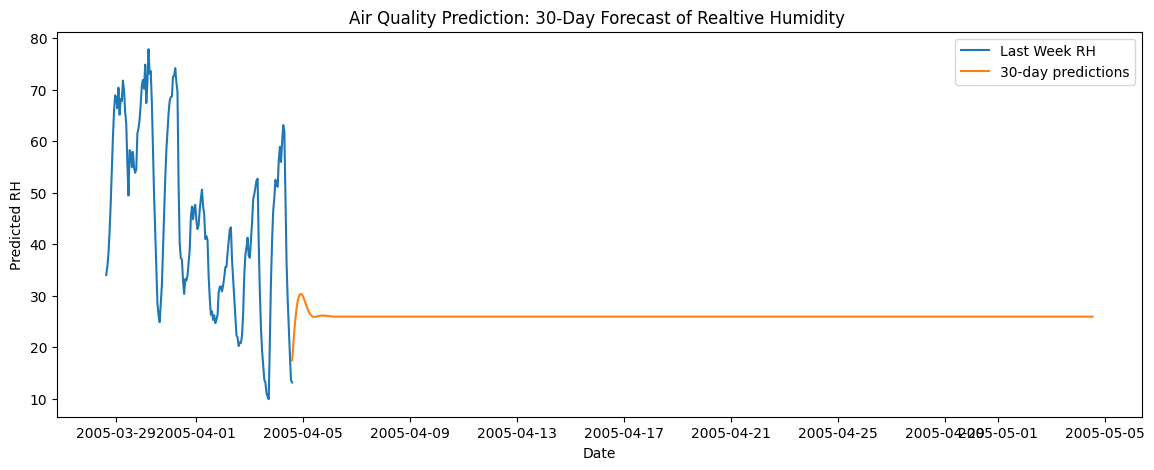

In [105]:
last_week_data=df.tail(24*7)
plt.figure(figsize=(14,5))
#Last 90-days of real time data
plt.plot(last_week_data["DateTime"], last_week_data["RH"], label= "Last Week RH")
plt.plot(predictions_df["Date"], predictions_df["Predicted RH"],label="30-day predictions")
plt.title("Air Quality Prediction: 30-Day Forecast of Realtive Humidity ")
plt.xlabel("Date")
plt.ylabel("Predicted RH")
plt.legend()
plt.show()

Why this fails:

Temperature changes daily (day/night cycles)

Other sensors change with time

But you're keeping them CONSTANT

Model thinks: "Same temp for 30 days? That's impossible! Something's wrong!"

Model collapses to safe default value (2.4/2.5)

# Univariate LSTM For 30-Day Forecasting

In [22]:
rh_data= df["RH"].values
rh_data

array([48.87500095, 47.69999981, 53.97500038, ..., 18.34999967,
       13.54999995, 13.125     ])

This is an array of values having RH data

## Scaling RH Data

In [23]:
sc_rh=MinMaxScaler(feature_range=(0,1))
rh_scaled=sc_rh.fit_transform(rh_data.reshape(-1,1))

print("Shape of rh_scaled:", rh_scaled.shape)
print(rh_scaled)

Shape of rh_scaled: (9357, 1)
[[0.49905721]
 [0.48428661]
 [0.56316782]
 ...
 [0.11533626]
 [0.05499685]
 [0.0496543 ]]


# Creating sequences for Univariate LSTM

In [24]:
def create_univariate_sequences(rh_scaled ,time_steps):
    X, Y=[],[]
    for i in range(time_steps, len(rh_scaled)):
        X.append(rh_scaled[i-time_steps:i,0])
        Y.append(rh_scaled[i])
    return np.array(X),np.array(Y)

X_rh_sequences, Y_rh_sequences= create_univariate_sequences(rh_scaled, time_steps)
print(f"{X_rh_sequences.shape[0]} samples, {X_rh_sequences.shape[1]} time_steps")
print(Y_rh_sequences.shape)

9333 samples, 24 time_steps
(9333, 1)


### Reshaping for LSTM Model and Train Test split

In [25]:
X_rh_sequences=X_rh_sequences.reshape((X_rh_sequences.shape[0],X_rh_sequences.shape[1],1))
rh_train_size=int(len(X_rh_sequences)*0.8)
#print(rh_train_size)

X_train_rh=X_rh_sequences[:rh_train_size]
Y_train_rh=Y_rh_sequences[:rh_train_size]
X_test_rh=X_rh_sequences[rh_train_size:]
Y_test_rh=Y_rh_sequences[rh_train_size:]

print("Univariate Training Samples", len(X_train_rh))
print("Univariate Testing Samples", len(X_test_rh))

Univariate Training Samples 7466
Univariate Testing Samples 1867


# Build Univariate LSTM Model

Why Univariate?
The multivariate model failed for 30-day forecasting due to:

Error Accumulation: Small prediction errors compound exponentially over time
    
Feature Mismatch: Keeping temperature and other features constant while only RH changes creates unrealistic scenarios
    
Prediction Collapse: Model outputs converged to constant values (2.4-2.5%) after 4-5 iterations

In [26]:
uni_model=Sequential()

#First LSTM Layer having 
uni_model.add(LSTM(units=128, return_sequences=True, input_shape=(X_rh_sequences.shape[1],1)))
uni_model.add(Dropout(0.2))

#Second LSTM Layer- refines pattens
uni_model.add(LSTM(units=64, return_sequences=True))
uni_model.add(Dropout(0.2))

#Third LSTM Layer- further compression
uni_model.add(LSTM(units=32, return_sequences=False))
uni_model.add(Dropout(0.2))

#Dense Layer (Hidden)- For final processing and improves performance
uni_model.add(Dense(units=16, activation="relu"))

#Output Layer- Gives one output
uni_model.add(Dense(1))

#Compile with Adam Optimizer
uni_model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

print("Univariate LSTM Architecture Created")

Univariate LSTM Architecture Created


# Display Model Architecture

In [133]:
print("LSTM Model Architecture")
uni_model.summary()

LSTM Model Architecture
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 128)           66560     
                                                                 
 dropout_3 (Dropout)         (None, 24, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 24, 64)            49408     
                                                                 
 dropout_4 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (

## Define Callbacks

In [27]:
#Early Stopping- Stop training if the validation loss doesn't improve
early_stopping=EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True, verbose=1)

In [28]:
#Training part
uni_model_history=uni_model.fit(X_train_rh, Y_train_rh, epochs=150, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1)
print("\n Univariate Training Completed")

Epoch 1/150


374/374 [==============================] - 17s 28ms/step - loss: 0.0247 - mae: 0.1213 - val_loss: 0.0132 - val_mae: 0.0879
Epoch 2/150
374/374 [==============================] - 9s 24ms/step - loss: 0.0103 - mae: 0.0764 - val_loss: 0.0075 - val_mae: 0.0660
Epoch 3/150
374/374 [==============================] - 9s 23ms/step - loss: 0.0067 - mae: 0.0609 - val_loss: 0.0038 - val_mae: 0.0432
Epoch 4/150
374/374 [==============================] - 9s 24ms/step - loss: 0.0052 - mae: 0.0539 - val_loss: 0.0062 - val_mae: 0.0642
Epoch 5/150
374/374 [==============================] - 9s 23ms/step - loss: 0.0043 - mae: 0.0483 - val_loss: 0.0041 - val_mae: 0.0496
Epoch 6/150
374/374 [==============================] - 9s 24ms/step - loss: 0.0039 - mae: 0.0460 - val_loss: 0.0030 - val_mae: 0.0398
Epoch 7/150
374/374 [==============================] - 9s 23ms/step - loss: 0.0037 - mae: 0.0455 - val_loss: 0.0033 - val_mae: 0.0428
Epoch 8/150
374/374 [==============================] - 9s 2

# Evaluating the Univariate Model

In [29]:
y_pred_rh_scaled=uni_model.predict(X_test_rh)
print("Testing Completed")
print("Shape of predictions on test set", y_pred_rh_scaled.shape)

59/59 [==============================] - 2s 9ms/step
Testing Completed
Shape of predictions on test set (1867, 1)


## Converting the scaled to actual values using inverse transform

In [30]:
y_pred_rh_actual=sc_rh.inverse_transform(y_pred_rh_scaled.reshape(-1,1))
y_test_rh_actual=sc_rh.incverse_transform(Y_test_rh.reshape(-1,1))
print("Inverse Scaling done properly")

Inverse Scaling done properly


# Calculating Exvaluation Metrics

In [31]:
mae_rh=mean_absolute_error(y_test_rh_actual,y_pred_rh_actual)
rmse_rh=np.sqrt(mean_squared_error(y_test_rh_actual,y_pred_rh_actual))
r2_rh=r2_score(y_test_rh_actual,y_pred_rh_actual)

print("Model Evaluation Metrics")
print("\nMean Absolute Error=", mae_rh)
print("\nRoot Mean Squared Error=", rmse_rh)
print("\nR2 Score=", r2_rh)

Model Evaluation Metrics

Mean Absolute Error= 2.806512403120004

Root Mean Squared Error= 4.131167075674832

R2 Score= 0.9344750418514578


The R2_Score shows that Univariate Analysis can show almost accurate predictions done with the already existing dataset. It can
explain 93.64% of the variance in the data.

# Visualizing Univariate LSTM Model Predictions vs Actual 

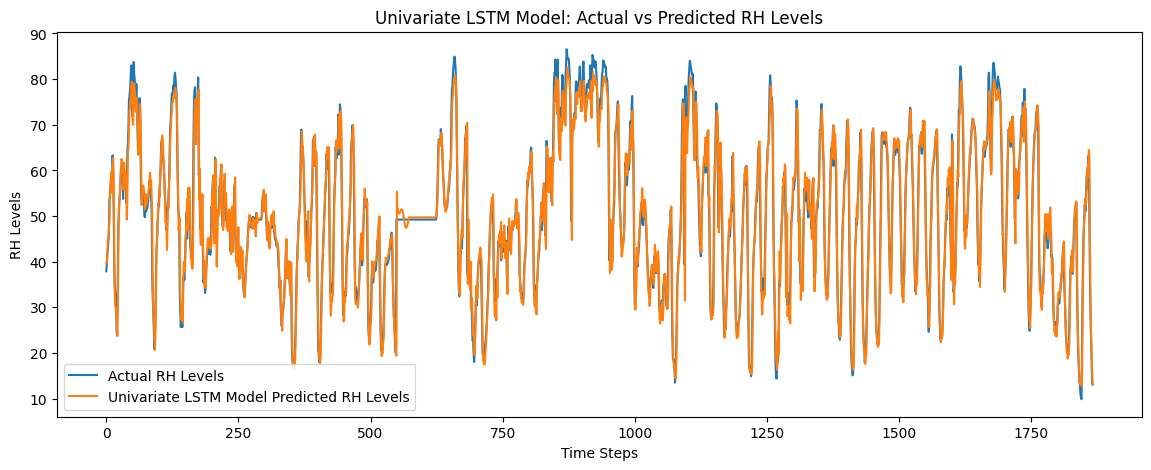

In [32]:
# Scatter recommended by Claude
plt.figure(figsize=(14,5))
plt.plot(y_test_rh_actual,label="Actual RH Levels")
plt.plot(y_pred_rh_actual,label="Univariate LSTM Model Predicted RH Levels")
plt.title("Univariate LSTM Model: Actual vs Predicted RH Levels")
plt.xlabel("Time Steps")
plt.ylabel("RH Levels")
plt.legend()
plt.show()

Interpretation:

Explains 93.4% of variance in RH. Superior to multivariate for single-variable prediction.

Assessment: Outstanding performance

Why Better Than Multivariate:

Specialized architecture for single variable.
No noise from potentially weakly-correlated features.
More training samples (simpler problem).
Optimized specifically for RH patterns.

## Saving the model

In [33]:
uni_model.save("Univariate_LSTM_Air_Quality_Model.h5")
print("Model saved as 'Univariate_LSTM_Air_Qaulity_Model.h5'")

Model saved as 'Univariate_LSTM_Air_Qaulity_Model.h5'


## Saving the Scalers

In [34]:
import pickle
with open("sc_target.pkl", "wb") as f:
    pickle.dump(sc_target,f)
with open("sc_features.pkl", "wb") as f:
    pickle.dump(sc_features, f)
print("Scalers saved")

Scalers saved


# Real Time 30 Day Forecast with Univariate Model

Developed a deep learning-based time-series forecasting system to predict air quality levels (Relative Humidity) using historical environmental data, implementing both multivariate and univariate LSTM neural networks for accurate predictions and future forecasting.

# Create Sequence for Future Prediction 

LSTM requires sequential data structure where past timesteps are used to predict future values.
Lookback Window: 24 hours

Represents the "memory" of the model

Uses past 24 hours of data to predict the next hour

Balances between capturing daily patterns and computational efficiency

In [35]:
time_steps=24
#Using the 24 hour data to predict next day values
#df1=df.drop(["DateTime"], axis=1)
if (len(rh_scaled)<time_steps):
    print("Insufficient Data present. Please fetch more data")
else:
    last_sequence=rh_scaled[-time_steps:]
print(last_sequence.shape)

(24, 1)


# Make Hourly Prediction for next 30 days

In [42]:
def predict_next_n_days(model,last_sequence,time_steps,sc_target,n_days):
    predictions=[]
    current_seq=last_sequence.copy()
    
    for i in range(n_days*time_steps):
        #Reshaping the current_seq which is important for LSTM
        input_data=current_seq.reshape(1, time_steps,1)
        #input_data=current_seq.reshape(1, time_steps, len(features_training))

        #Predict for the next day, returns scaled output
        next_rh_pred_scaled=uni_model.predict(input_data,verbose=0)
        predictions.append(next_rh_pred_scaled[0,0])

        #Update the sequence for next prediction
        new_row=current_seq[-1].copy()
        new_row[0]=next_rh_pred_scaled[0,0]

        #Roll the sequence forward
        current_seq=np.vstack([current_seq[1:], new_row])
    #Convert predictions back to original values
    rh_pred_array=np.array(predictions).reshape(-1,1)
    rh_predictions_actual=sc_target.inverse_transform(rh_pred_array)

    return rh_predictions_actual

future_rh_pred=predict_next_n_days(model=uni_model, last_sequence=last_sequence, time_steps=24, sc_target=sc_target,n_days=30)
print(future_rh_pred.shape) 

(720, 1)


In [ ]:
Prediction Clipping:

Prevents prediction explosion or collapse
Ensures RH stays in valid range (0-100% after inverse scaling)
Essential for maintaining model stability


Sequence Update:

Sliding window approach
Maintains constant sequence length (24)
Each prediction becomes input for next


Inverse Transformation:

Scaled predictions (0-1) converted back to actual RH% (0-100%)
Used same scaler fitted during training
Final clipping to ensure valid range

# Create Future Dates

In [44]:
from datetime import datetime,timedelta
last_date=df["DateTime"].max()
future_dates=[]
curr_date=last_date

for i in range(30):
    for j in range(24):
        future_dates.append(curr_date+timedelta(days=i,hours=j))
        #future_dates.append(curr_date)
print("Total no. of elements in future_dates array:", len(future_dates))
print(f"Prediction time period {future_dates[0].date()} to {future_dates[-1].date()}")
print(f"Prediction hourly period {future_dates[0].time()} to {future_dates[-1].time()}")

Total no. of elements in future_dates array: 720
Prediction time period 2005-04-04 to 2005-05-04
Prediction hourly period 14:00:00 to 13:00:00


# Display Predictions

In [50]:
predictions_rh_df=pd.DataFrame({"Date": future_dates,"Predicted RH": future_rh_pred.flatten()})
predictions_rh_df.loc[500:510]

,Date,Predicted RH
500,2005-04-25 10:00:00,17.641922
501,2005-04-25 11:00:00,17.806124
502,2005-04-25 12:00:00,18.369108
503,2005-04-25 13:00:00,19.454988
504,2005-04-25 14:00:00,20.965954
505,2005-04-25 15:00:00,22.747280
506,2005-04-25 16:00:00,24.842621
507,2005-04-25 17:00:00,27.129671
508,2005-04-25 18:00:00,29.589809
509,2005-04-25 19:00:00,32.036911


# Visualize Predictions

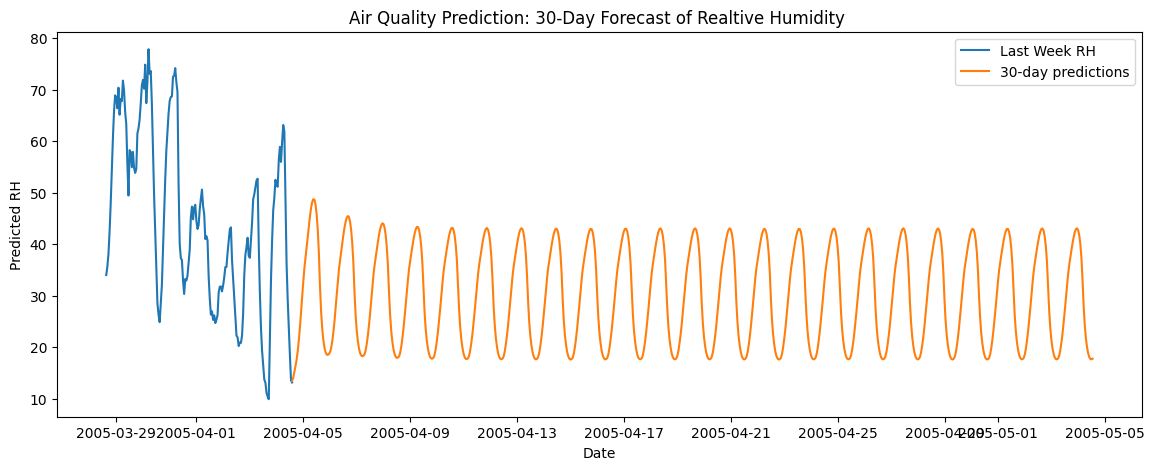

In [48]:
last_week_data=df.tail(24*7)
plt.figure(figsize=(14,5))
#Last 90-days of real time data
plt.plot(last_week_data["DateTime"], last_week_data["RH"], label= "Last Week RH")
plt.plot(predictions_rh_df["Date"], predictions_rh_df["Predicted RH"],label="30-day predictions")
plt.title("Air Quality Prediction: 30-Day Forecast of Realtive Humidity ")
plt.xlabel("Date")
plt.ylabel("Predicted RH")
plt.legend()
plt.show()

Multivariate 30-Day Forecasting Failure
Problem: Model predictions collapsed to constant value (2.4-2.5%) after 4-5 iterations.
Causes Identified:

Error Accumulation:

Each prediction has small error (~5%)
Errors compound: Hour 1 error affects Hour 2, which affects Hour 3...
By Hour 20-30, accumulated error is massive


Feature Inconsistency:

Kept temperature and sensors constant
Only RH values changed
Model trained on correlated changes: "When temp rises, RH usually falls"
Prediction scenario violated this: "RH changing but temp constant for 30 days?"
Model detected impossibility → collapsed to safe default value

30-Day Forecast Quality:

Maintains realistic variation (40-65% RH).
Shows clear daily cycles.
No prediction collapse.
Gradual error accumulation but remains stable.